In [1]:
import pandas as pd
import numpy as np
import itertools as it
import json
import re
from collections import Counter

In [2]:
%autosave 0
pd.set_option('display.max_columns', None)

Autosave disabled


## Create a pd.Series from a List

In [3]:
fruits = ["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple",
          "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry",
          "gooseberry", "papaya"]

In [4]:
fruits

['kiwi',
 'mango',
 'strawberry',
 'pineapple',
 'gala apple',
 'honeycrisp apple',
 'tomato',
 'watermelon',
 'honeydew',
 'kiwi',
 'kiwi',
 'kiwi',
 'mango',
 'blueberry',
 'blackberry',
 'gooseberry',
 'papaya']

In [4]:
fruit_series = pd.Series(fruits)

In [6]:
fruit_series

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

## Determine the number of elements in FRUITS

In [7]:
fruit_series.count()

17

## Output only the index in FRUIT_SERIES

In [8]:
fruit_series.index

RangeIndex(start=0, stop=17, step=1)

## Output only the values in FRUIT_SERIES

In [9]:
fruit_series.values

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew', 'kiwi',
       'kiwi', 'kiwi', 'mango', 'blueberry', 'blackberry', 'gooseberry',
       'papaya'], dtype=object)

## Confirm the data type in FRUIT_SERIES

In [10]:
fruit_series.dtype

dtype('O')

## Output only first 5 values in FRUIT_SERIES

In [11]:
fruit_series.head()

0          kiwi
1         mango
2    strawberry
3     pineapple
4    gala apple
dtype: object

## Output onlylast 3 values in FRUIT_SERIES

In [12]:
fruit_series.tail(3)

14    blackberry
15    gooseberry
16        papaya
dtype: object

## Output 2 random values in FRUIT_SERIES

In [13]:
fruit_series.sample(2)

13     blueberry
15    gooseberry
dtype: object

## Run .describe() method on FRUIT_SERIES

In [14]:
fruit_series.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

## Output only the UNIQUE values in FRUIT_SERIES

In [15]:
fruit_series.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [16]:
fs_unique = pd.Series(fruit_series.unique())
len(fs_unique),fs_unique.count()

(13, 13)

## Count occurance of the UNIQUE values in FRUIT_SERIES

In [17]:
fruit_series.value_counts()

kiwi                4
mango               2
strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

## What value occurs most frequently in FRUIT_SERIES?

In [18]:
fruit_series.value_counts().nlargest(n=1)

kiwi    4
dtype: int64

## What value occurs least frequently in FRUIT_SERIES?

In [19]:
fruit_series.value_counts().nsmallest(n=1,keep='all')

strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

# PART II

## Capitalize all string values in FRUIT_SERIES

In [20]:
fruit_series.str.upper()

0                 KIWI
1                MANGO
2           STRAWBERRY
3            PINEAPPLE
4           GALA APPLE
5     HONEYCRISP APPLE
6               TOMATO
7           WATERMELON
8             HONEYDEW
9                 KIWI
10                KIWI
11                KIWI
12               MANGO
13           BLUEBERRY
14          BLACKBERRY
15          GOOSEBERRY
16              PAPAYA
dtype: object

In [21]:
fruit_series.str.title()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala Apple
5     Honeycrisp Apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

## Count the occurance of letter 'A' in all strings

In [22]:
fruit_series[0].count('a')

0

In [23]:
fruit_series[1].count('a')

1

In [24]:
# counter = Counter(fruit_series[1])

# counter['a']

In [25]:
fruit_series_a_counts = [fruit_series[i].count('a') for i in range(0,len(fruit_series))]

In [26]:
fruit_series_a_counts = np.array(fruit_series_a_counts)

In [27]:
fruit_series_a_counts

array([0, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 3])

In [28]:
fruit_series_a_counts.sum()

14

## Count the occurance of VOWELS in each string

In [29]:
fruit_series_a_counts = np.array([fruit_series[i].count('a') for i in range(0,len(fruit_series))])
fruit_series_e_counts = np.array([fruit_series[i].count('e') for i in range(0,len(fruit_series))])
fruit_series_i_counts = np.array([fruit_series[i].count('i') for i in range(0,len(fruit_series))])
fruit_series_o_counts = np.array([fruit_series[i].count('o') for i in range(0,len(fruit_series))])
fruit_series_u_counts = np.array([fruit_series[i].count('u') for i in range(0,len(fruit_series))])

In [30]:
pd.Series([fruit_series_a_counts[i]+fruit_series_e_counts[i]+fruit_series_i_counts[i]+
           fruit_series_o_counts[i]+fruit_series_u_counts[i] for i in range(0,len(fruit_series))])

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

## Return the longest String Value from FRUITS

In [31]:
len(fruit_series[0])

4

In [32]:
lenths = pd.Series([len(fruit_series[i]) for i in range(0,len(fruit_series))])

In [33]:
lenths

0      4
1      5
2     10
3      9
4     10
5     16
6      6
7     10
8      8
9      4
10     4
11     4
12     5
13     9
14    10
15    10
16     6
dtype: int64

In [34]:
lenths.nlargest(n=1)

5    16
dtype: int64

In [35]:
lenths.nlargest(n=1).index

Int64Index([5], dtype='int64')

In [36]:
fruit_series[lenths.nlargest(n=1).index]

5    honeycrisp apple
dtype: object

## Return the String Values from FRUITS where len >= 5

In [37]:
lenths[lenths >= 5]

1      5
2     10
3      9
4     10
5     16
6      6
7     10
8      8
12     5
13     9
14    10
15    10
16     6
dtype: int64

In [38]:
fruit_series[lenths >= 5]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

## Return the String Values from FRUITS where 'o' occurs 2 or more times

In [39]:
fruit_series_o_counts = pd.Series(fruit_series_o_counts)

In [40]:
fruit_series_o_counts

0     0
1     1
2     0
3     0
4     0
5     1
6     2
7     1
8     1
9     0
10    0
11    0
12    1
13    0
14    0
15    2
16    0
dtype: int64

In [41]:
fruit_series[fruit_series_o_counts >= 2]

6         tomato
15    gooseberry
dtype: object

## Return the String Values from FRUITS where substring 'berry' exists

In [45]:
fruit_series[(fruit_series.str.contains('berry')) | (fruit_series.str.contains('Berry'))]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

## Return the String Values from FRUITS where substring 'apple' exists

In [52]:
fruit_series[(fruit_series.str.contains('apple')) | (fruit_series.str.contains('Apple'))]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [53]:
fruit_series.str.contains('apple')

0     False
1     False
2     False
3      True
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
dtype: bool

## Which String value contains the most vowels?

In [54]:
vowel_count = pd.Series([fruit_series_a_counts[i]+fruit_series_e_counts[i]+fruit_series_i_counts[i]+
           fruit_series_o_counts[i]+fruit_series_u_counts[i] for i in range(0,len(fruit_series))])

In [55]:
fruit_series[vowel_count.nlargest(n=1).index]

5    honeycrisp apple
dtype: object

# PART III

## Which letter occurs most frequently in the Series?

In [5]:
raw_string = 'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzp\
wejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'

In [7]:
letters_list = list(raw_string)

In [8]:
len(letters_list)

200

In [9]:
letters_Series = pd.Series(letters_list)

In [10]:
letters_Series

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

In [16]:
letter_counts = letters_Series.value_counts()

In [18]:
letter_counts.nlargest(n=1,keep='all')

y    13
dtype: int64

## How many elements exist in the Series?

In [19]:
len(letters_list)

200

## Which letter occurs LEAST frequently in the Series?

In [20]:
letter_counts.nsmallest(n=1,keep='all')

l    4
dtype: int64

## How many vowels in the Series?

In [21]:
vowels = list('aeiou')

In [30]:
letters_Series.isin(vowels).value_counts()

False    166
True      34
dtype: int64

## How many consonants in the Series?

In [31]:
consonants = list('bcdfghjklmnpqrstvwxyz')

In [32]:
letters_Series.isin(consonants).value_counts()

True     166
False     34
dtype: int64

## Create a Series with each letter in Uppercase

In [34]:
letters_Series.str.upper()

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

In [35]:
letters_Series_upper = letters_Series.str.upper()

## Create a BARPLOT of the freqs of the top 6 most common letters?

In [36]:
letter_counts

y    13
p    12
w    10
b     9
n     9
k     9
m     9
r     8
a     8
o     8
h     8
x     8
q     8
c     8
d     8
u     7
v     7
t     7
z     7
e     6
f     6
j     6
g     5
i     5
s     5
l     4
dtype: int64

<Axes: >

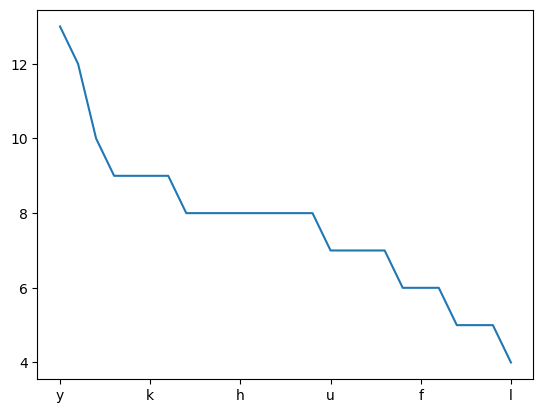

In [37]:
letter_counts.plot()

<Axes: >

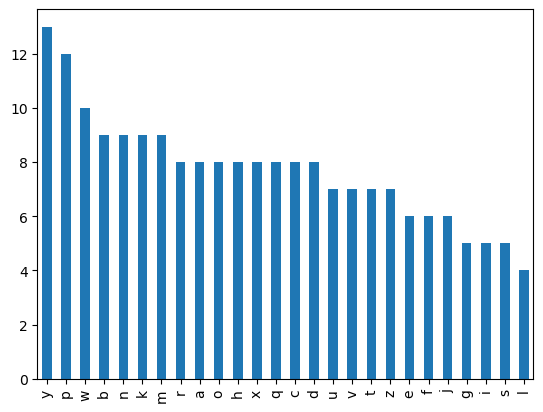

In [38]:
letter_counts.plot.bar()

[Text(0.5, 0, 'Letter'), Text(0, 0.5, 'Count')]

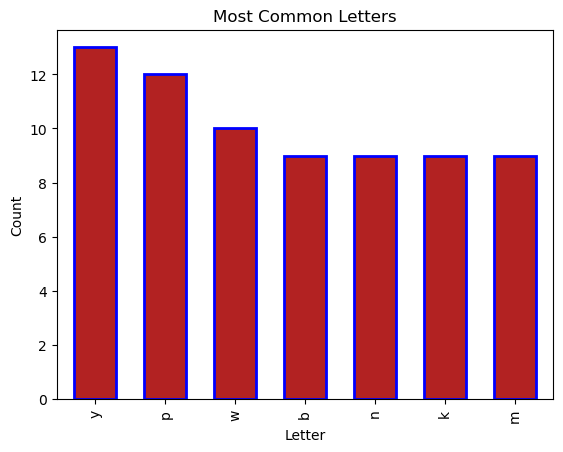

In [50]:
letter_counts.nlargest(n=6,keep='all').plot.bar(title='Most Common Letters',
                                                color='firebrick',
                                                ec='blue',
                                                lw=2,
                                                width=.6).set(xlabel='Letter',ylabel='Count')

## Create a Series from the following list

In [51]:
num_list = ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01',
 '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5',
 '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']

In [53]:
num_Series = pd.Series(num_list) # these are string objects

## What is data type of the Series?

In [54]:
num_Series.dtype

dtype('O')

## How many elements in the Series?

In [55]:
len(num_Series)

20

## Convert Series to numeric dtype

In [64]:
num_only = num_Series.str.replace('$','').str.replace(',','')

/var/folders/ty/2pnn6wsj06n_glzjgbmxzlkw0000gn/T/ipykernel_4842/3367348362.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  num_only = num_Series.str.replace('$','').str.replace(',','')


In [65]:
num_only

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4      2121418.3
5      1260813.3
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12     4513644.5
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: object

In [67]:
num_Series = num_only.astype('float')

In [68]:
num_Series

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

## Max value of Series?

In [69]:
num_Series.nlargest(n=1,keep='all')

11    4789988.17
dtype: float64

## Min value of Series?

In [70]:
num_Series.nsmallest(n=1,keep='all')

1    278.6
dtype: float64

## Range of Values in Series?

In [81]:
num_Series.nlargest(n=1,keep='all').values[0] - num_Series.nsmallest(n=1,keep='all').values[0]

4789709.57

## Bin the Data into 4 equally-sized bins.  How many values exist in each bin?

In [83]:
num_bins = pd.cut(num_Series,4)

In [84]:
num_bins.value_counts()

(-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

## Plot the bin-counts in a meaningful way

<Axes: title={'center': 'Most Common Value Groupings'}, xlabel='bins', ylabel='Count'>

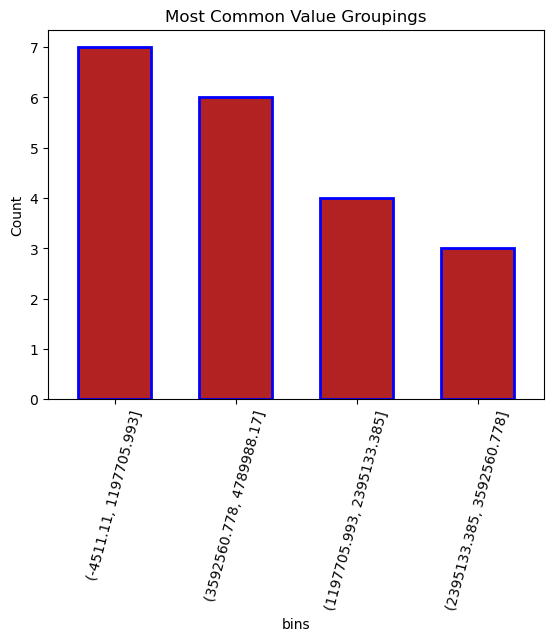

In [95]:
num_bins.value_counts().plot.bar(title='Most Common Value Groupings',rot=75,
                                 color='firebrick',ec='blue',lw=2,width=.6,xlabel='bins',ylabel='Count')